In [57]:
import hashlib
import h5py
import numpy as np
import os
import torch as pt
import torch
from torch_geometric.data import Data, Dataset, download_url
from tqdm import tqdm
from collections import defaultdict

atom_encoder = {
    "H": 0,
    "Li": 1,
    "Be": 2,
    "B": 3,
    "C": 4,
    "N": 5,
    "O": 6,
    "F": 7,
    "Na": 8,
    "Mg": 9,
    "Al": 10,
    "Si": 11,
    "P": 12,
    "S": 13,
    "Cl": 14
}
atomic_nb = [
    1,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
]
atom_decoder = {i: k for i, k in zip(atomic_nb, atom_encoder)}

properties_list = ['DIP', 'HLgap', 'eAT', 'eC', 'eEE', 'eH', 'eKIN', 'eKSE', 'eL',
                   'eNE', 'eNN', 'ePBE0+MBD', 'eTS', 'eX', 'eXC', 'eXX', 'mPOL']

path = "/Users/juliancremer/Documents/e3mol_local/aqm/aqm_data/raw/AQMdat.hdf5"

atom_types = []
atomic_numbers = []
atomic_types_dict = defaultdict(int)
atomic_numbers_dict = defaultdict(int)
n_nodes_dict = defaultdict(int)
atom_types_dist = defaultdict(int)
max_n_nodes = 0

for mol in tqdm(h5py.File(path).values(), desc="Molecules"):
    for group_name in mol:
        group = mol[group_name]

        all_prop = []
        z = pt.tensor(np.array(group["atNUM"]), dtype=pt.long)
        n_nodes_dict[len(z)] += 1
        
        for a_n in z:
            if int(a_n) not in atomic_numbers:
                atomic_numbers.append(int(a_n))
            atomic_numbers_dict[int(a_n)] += 1   
            
            max_n_nodes = len(z) if len(z) > max_n_nodes else max_n_nodes
                
            a_t = atom_decoder[int(a_n)]
            if a_t not in atom_types:
                atom_types.append(a_t)
            atomic_types_dict[a_t] += 1
            atom_types_dist[a_t]
        
        for prop in properties_list:
            tmp = pt.tensor(np.array(group[prop]), dtype=pt.float32)
            all_prop.append(tmp)
        y = pt.cat(all_prop).unsqueeze(0)
        


Molecules:  11%|██████▌                                                       | 177/1673 [00:09<01:20, 18.65it/s]


KeyboardInterrupt: 

In [55]:
path = "/Users/juliancremer/Documents/e3mol_local/aqm/aqm_data/raw/AQMdat.hdf5"

h5py.File(path)

<HDF5 file "AQMdat.hdf5" (mode r)>

In [52]:
np.array(group['HLgap'])

array([6.469295])

In [50]:
group.keys()

<KeysViewHDF5 ['DIP', 'HLgap', 'KSE', 'atC6', 'atNUM', 'atPOL', 'atXYZ', 'eAT', 'eC', 'eEE', 'eH', 'eKIN', 'eKSE', 'eL', 'eMBD', 'eNE', 'eNELEC', 'eNN', 'ePBE0', 'ePBE0+MBD', 'eSOLV', 'eTS', 'eX', 'eXC', 'eXX', 'hCHG', 'hDIP', 'hRAT', 'hVDIP', 'hVOL', 'mC6', 'mPOL', 'mTPOL', 'pbe0FOR', 'sCAV', 'sMIT', 'totFOR', 'vCAV', 'vDIP', 'vEQ', 'vIQ', 'vTQ', 'vdwFOR', 'vdwR']>

In [33]:
rate = np.array(list(n_nodes_dict.keys()))
amount = np.array(list(n_nodes_dict.values()))
weighted_avg = np.average(rate, weights=amount)
weighted_avg

50.88283369675583

<BarContainer object of 85 artists>

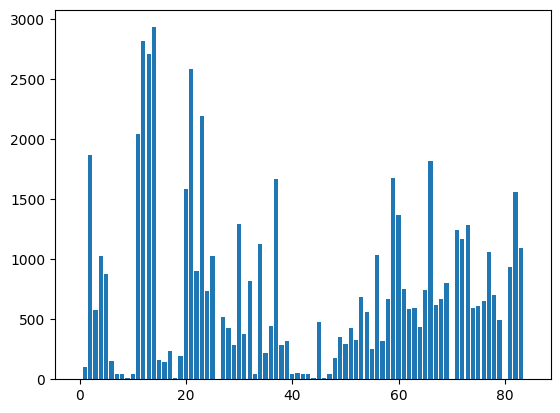

In [32]:
import matplotlib.pyplot as plt
names = list(n_nodes_dict.keys())
values = list(n_nodes_dict.values())

plt.bar(range(len(n_nodes_dict)), values)

In [58]:
mol_properties = ['DIP', 'HLgap', 'eAT', 'eC', 'eEE', 'eH', 'eKIN', 'eKSE', 'eL',
                   'eNE', 'eNN', 'ePBE0+MBD', 'eTS', 'eX', 'eXC', 'eXX', 'mPOL']

PROP_TO_IDX = {k: i for i, k in enumerate(mol_properties)}
PROP_TO_IDX

{'DIP': 0,
 'HLgap': 1,
 'eAT': 2,
 'eC': 3,
 'eEE': 4,
 'eH': 5,
 'eKIN': 6,
 'eKSE': 7,
 'eL': 8,
 'eNE': 9,
 'eNN': 10,
 'ePBE0+MBD': 11,
 'eTS': 12,
 'eX': 13,
 'eXC': 14,
 'eXX': 15,
 'mPOL': 16}